In [270]:
import cccmautils as cutl
import constants as con
import pandas as pd
import numpy.ma as ma
import scipy.io as sio
import matplotlib.lines as mlines
import rlx_utils as rutl
import cmocean as cmo

import loadCanESM2rlxdata as lrlx

%matplotlib inline


field='tos'
sea='DJF' # ANN only for MOC
zconv = 1/con.get_g()


casenames = ('preipreiice', 'prei2xco2iceb','2xco22xco2ice','2xco2preiice',
            'piControl','gregory_2xco2')#'pi2xco2ipulse', 
shortnames = {'preipreiice': '1C_1I',
             'prei2xco2iceb': '1C_2I',
             'pi2xco2ipulse': '1C_2Ipulse',
             '2xco22xco2ice': '2C_2I',
             '2xco2preiice': '2C_1I'}

colors = {'preipreiice': 'k', 'prei2xco2iceb': 'b', 
            'pi2xco2ipulse': 'cyan', '2xco22xco2ice': 'r',
            '2xco2preiice': 'pink',
          'piControl':'0.5', 'gregory_2xco2':'brown'}
years = {'preipreiice': '2922-3121',
             'prei2xco2iceb': '3022-3221',
             '2xco22xco2ice': '2452-2651',
             '2xco2preiice': '2552-2751',
        'piControl':'2911-3010', 'gregory_2xco2':'2451-2550'}

# This is for all 301 years of perturbed runs
yearsts = {'preipreiice': '2922-3121',
             'prei2xco2iceb': '2921-3221',
             '2xco22xco2ice': '2452-2651',
             '2xco2preiice': '2451-2751',
          'piControl':'2911-3010', 'gregory_2xco2':'2451-2550'}

verb=True


DataRoot = '/Users/kelly/DATA/DataDisk/fromMICHAEL/'



In [271]:
data={}
for casename in casenames:
    
    filename = DataRoot + casename+'_'+field+'_'+years[casename]+'_'+sea+'_mean.nc'
    print filename
    data[casename] = cnc.getNCvar(filename,field)
    
lat=cnc.getNCvar(filename,'lat')
lon=cnc.getNCvar(filename,'lon')



/Users/kelly/DATA/DataDisk/fromMICHAEL/preipreiice_tos_2922-3121_DJF_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/prei2xco2iceb_tos_3022-3221_DJF_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/2xco22xco2ice_tos_2452-2651_DJF_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/2xco2preiice_tos_2552-2751_DJF_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/piControl_tos_2911-3010_DJF_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/gregory_2xco2_tos_2451-2550_DJF_mean.nc


(192, 256)
(192,)
(256,)


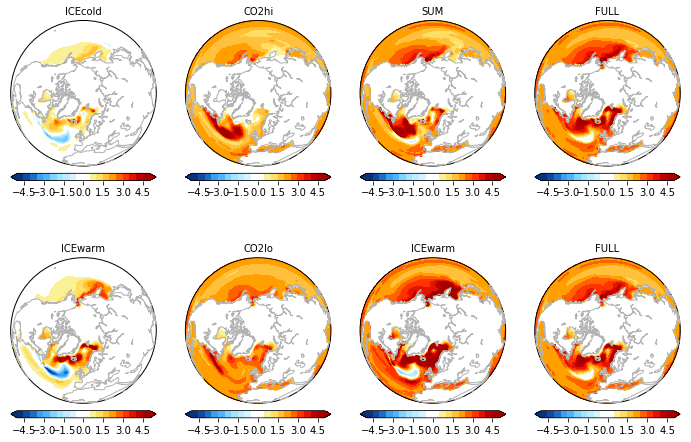

In [294]:
print data['preipreiice'].shape
print lat.shape
print lon.shape

fig,axs=plt.subplots(2,4,figsize=(12,8))
ax=axs[0,0]
            
cplt.kemmap(data['prei2xco2iceb']-data['preipreiice'],
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='ICEcold');

ax=axs[0,1]   
cplt.kemmap(data['2xco2preiice']-data['preipreiice'],
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='CO2hi');

ax=axs[0,2]
cplt.kemmap((data['prei2xco2iceb']-data['preipreiice'])+\
            (data['2xco2preiice']-data['preipreiice']),
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='SUM');

ax=axs[0,3]
cplt.kemmap(data['2xco22xco2ice']-data['preipreiice'],
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='FULL');

ax=axs[1,0]
cplt.kemmap(data['2xco22xco2ice']-data['2xco2preiice'],
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='ICEwarm');
ax=axs[1,1]
cplt.kemmap(data['2xco22xco2ice']-data['prei2xco2iceb'],
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='CO2lo');
ax=axs[1,2]
cplt.kemmap((data['2xco22xco2ice']-data['2xco2preiice'])+\
            (data['2xco22xco2ice']-data['prei2xco2iceb']),
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='SUM');

ax=axs[1,3]
cplt.kemmap(data['2xco22xco2ice']-data['preipreiice'],
                lat,lon,cmin=-5,cmax=5,ptype='nh',axis=ax,title='FULL');


In [273]:
field='msftmyz' # units kg/s
# to convert to Sv, must divide by density of seawater (~1000kg/m3), and by 10^6
# [1 Sv = 10^6 m3/s]
svconv = 1/1e9

seamoc='ANN'
MOC={}; MOCts={}
for casename in casenames:
    
    filename = DataRoot + casename+'_'+field+'_'+years[casename]+'_'+seamoc+'_mean.nc'
    print filename
    MOC[casename] = cnc.getNCvar(filename,field)*svconv
    filename = DataRoot + casename+'_'+field+'_'+yearsts[casename]+'_'+seamoc+'.nc'
    print filename
    MOCts[casename] = cnc.getNCvar(filename,field)*svconv
    
lev=cnc.getNCvar(filename,'lev')


/Users/kelly/DATA/DataDisk/fromMICHAEL/preipreiice_msftmyz_2922-3121_ANN_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/preipreiice_msftmyz_2922-3121_ANN.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/prei2xco2iceb_msftmyz_3022-3221_ANN_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/prei2xco2iceb_msftmyz_2921-3221_ANN.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/2xco22xco2ice_msftmyz_2452-2651_ANN_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/2xco22xco2ice_msftmyz_2452-2651_ANN.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/2xco2preiice_msftmyz_2552-2751_ANN_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/2xco2preiice_msftmyz_2451-2751_ANN.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/piControl_msftmyz_2911-3010_ANN_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/piControl_msftmyz_2911-3010_ANN.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/gregory_2xco2_msftmyz_2451-2550_ANN_mean.nc
/Users/kelly/DATA/DataDisk/fromMICHAEL/gregory_2xco2_msftmyz_2451-2550_ANN.nc


(3, 41, 192)
(301, 3, 41, 192)
0.666666666667


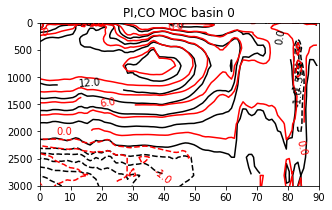

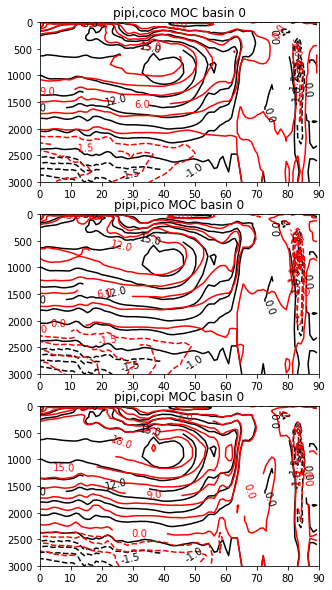

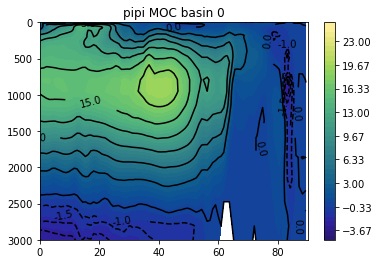

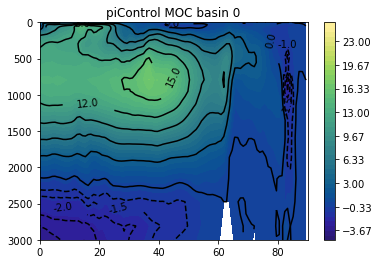

In [276]:
print MOC['preipreiice'].shape
print MOCts['2xco2preiice'].shape

# region =
#  "atlantic_arctic_ocean", 
#  "indian_pacific_ocean ",
#  "global_ocean  
basin=0 

pipimoc = MOC['preipreiice'][basin,...]
cocomoc = MOC['2xco22xco2ice'][basin,...]
picomoc = MOC['prei2xco2iceb'][basin,...]
copimoc = MOC['2xco2preiice'][basin,...]

PI = MOC['piControl'][basin,...]
CO = MOC['gregory_2xco2'][basin,...]

#print pipimoc.shape
#print pipimoc.max, pipimoc.min

lats,levs = np.meshgrid(lat,lev)

#contsp = np.arange(0,36,3)#[0,2,4,6,8,10,12,14,16,18,20]
contsp = np.arange(0,37,3)
contsn = np.arange(-5,-.5,.5)


cmapc=cmo.cm.haline
cminc=-5;cmaxc=25
cmlen=float(30)
incr = (cmax-cmin) / (cmlen)
contsc = np.arange(cminc,cmaxc+incr,incr)
print incr

#  the unconstrained controls:
fig,ax=plt.subplots(1,1,figsize=(5,3))
CS1 = ax.contour(lats,levs,PI,contsp,\
            colors='k',linestyles='solid')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,PI,contsn,\
            colors='k',linestyles='dashed')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

CS2 = ax.contour(lats,levs,CO,contsp,\
            colors='red',linestyles='solid')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = ax.contour(lats,levs,CO,contsn,\
            colors='red',linestyles='dashed')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('PI,CO MOC basin '+str(basin))


fig,axs=plt.subplots(3,1,figsize=(5,10))
ax=axs[0]
CS1 = ax.contour(lats,levs,pipimoc,contsp,\
            colors='k',linestyles='solid')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsn,\
            colors='k',linestyles='dashed')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

CS2 = ax.contour(lats,levs,cocomoc,contsp,\
            colors='red',linestyles='solid')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = ax.contour(lats,levs,cocomoc,contsn,\
            colors='red',linestyles='dashed')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('pipi,coco MOC basin '+str(basin))

ax=axs[1]
CS1 = ax.contour(lats,levs,pipimoc,contsp,\
            colors='k',linestyles='solid')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsn,\
            colors='k',linestyles='dashed')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

CS2 = ax.contour(lats,levs,picomoc,contsp,\
            colors='red',linestyles='solid')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = ax.contour(lats,levs,picomoc,contsn,\
            colors='red',linestyles='dashed')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('pipi,pico MOC basin '+str(basin))

ax=axs[2]
CS1 = ax.contour(lats,levs,pipimoc,contsp,\
            colors='k',linestyles='solid')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsn,\
            colors='k',linestyles='dashed')
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

CS2 = ax.contour(lats,levs,copimoc,contsp,\
            colors='red',linestyles='solid')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = ax.contour(lats,levs,copimoc,contsn,\
            colors='red',linestyles='dashed')
ax.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('pipi,copi MOC basin '+str(basin))





fig = plt.figure()
ax = fig.add_subplot(111)
CF1 = plt.contourf(lats,levs,pipimoc,levels=contsc,cmap=cmapc,vmin=cminc,vmax=cmaxc)
#plt.clabel(CF1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,pipimoc,contsp,\
            colors='k',linestyles='solid')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,pipimoc,contsn,\
            colors='k',linestyles='dashed')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('pipi MOC basin '+str(basin))
cbar = fig.colorbar(CF1)



fig = plt.figure()
ax = fig.add_subplot(111)
CF1 = plt.contourf(lats,levs,PI,levels=contsc,cmap=cmapc,vmin=cminc,vmax=cmaxc)
#plt.clabel(CF1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,PI,contsp,\
            colors='k',linestyles='solid')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,PI,contsn,\
            colors='k',linestyles='dashed')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('piControl MOC basin '+str(basin))
cbar = fig.colorbar(CF1)

## Difference of AMOCs

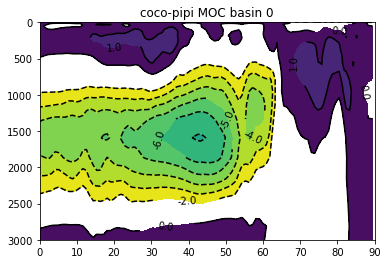

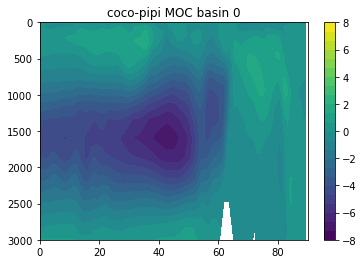

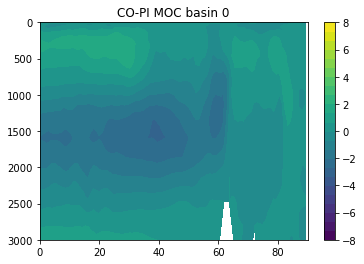

In [277]:
contspd = np.arange(0,15,1)
contsnd = np.arange(-15,-1,1)
contsalld = np.arange(-15,16,1)

fig = plt.figure()
ax = fig.add_subplot(111)
CS1 = plt.contour(lats,levs,cocomoc-pipimoc,contspd,\
            colors='k',linestyles='solid')
plt.contourf(lats,levs,cocomoc-pipimoc,contspd)
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,cocomoc-pipimoc,contsnd,\
            colors='k',linestyles='dashed')
plt.contourf(lats,levs,cocomoc-pipimoc,contsnd)
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('coco-pipi MOC basin '+str(basin))


cmin=-8;cmax=8
cmap=cmo.cm.delta
cmlen=float(24)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)


# color fill
fig = plt.figure()
ax = fig.add_subplot(111)
CF1=plt.contourf(lats,levs,cocomoc-pipimoc,levels=conts,vmin=cmin,vmax=cmax)
#plt.clabel(CF1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('coco-pipi MOC basin '+str(basin))
cbar = fig.colorbar(CF1)


# unconstrained controls
fig = plt.figure()
ax = fig.add_subplot(111)
CF1=plt.contourf(lats,levs,CO-PI,levels=conts,vmin=cmin,vmax=cmax)
#plt.clabel(CF1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('CO-PI MOC basin '+str(basin))
cbar = fig.colorbar(CF1)

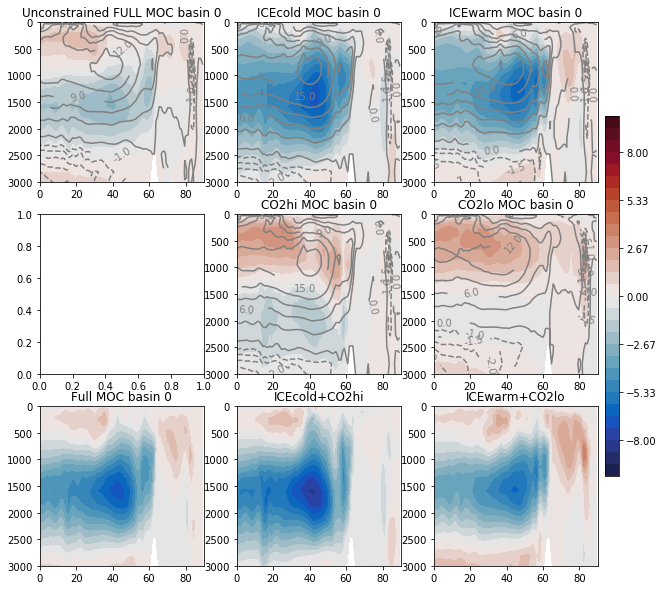

In [278]:
printtofile=True


cmin=-10;cmax=10
cmap= cmo.cm.balance #cmo.cm.delta
cmlen=float(30)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

fig,axs = plt.subplots(3,3,figsize=(10,10))
ax=axs[0,0]
CF1=ax.contourf(lats,levs,CO-PI,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
CS1 = ax.contour(lats,levs,PI,contsp,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,PI,contsn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('Unconstrained FULL MOC basin '+str(basin))


ax=axs[0,1]
CF1=ax.contourf(lats,levs,picomoc-pipimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,picomoc-pipimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
# climo contours
CS1 = ax.contour(lats,levs,pipimoc,contsp,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('ICEcold MOC basin '+str(basin))

ax=axs[0,2]
CF1=ax.contourf(lats,levs,cocomoc-copimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,cocomoc-copimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,copimoc,contsp,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,copimoc,contsn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('ICEwarm MOC basin '+str(basin))
#cbar = fig.colorbar(CF1)
cplt.add_colorbar(fig,CF1,orientation='vertical')

ax=axs[1,0]

ax=axs[1,1]
CF1=ax.contourf(lats,levs,copimoc-pipimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,copimoc-pipimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsp,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('CO2hi MOC basin '+str(basin))

ax=axs[1,2]
CF1=ax.contourf(lats,levs,cocomoc-picomoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,cocomoc-picomoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,picomoc,contsp,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,picomoc,contsn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('CO2lo MOC basin '+str(basin))

ax=axs[2,0]
CF1=ax.contourf(lats,levs,cocomoc-pipimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,cocomoc-pipimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
# Not sure what the climo contours would be here @@@@
#CS1 = ax.contour(lats,levs,pipimoc,contsp,\
#            linestyles='solid',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,pipimoc,contsn,\
#            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('Full MOC basin '+str(basin))

ax=axs[2,1]
CF1=ax.contourf(lats,levs,(picomoc-pipimoc)+(copimoc-pipimoc),
                cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,(picomoc-pipimoc)+(copimoc-pipimoc),
#               levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,pipimoc,contsp,\
#            linestyles='solid',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,pipimoc,contsn,\
#            linestyles='dashed',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('ICEcold+CO2hi')

ax=axs[2,2]
CF1=ax.contourf(lats,levs,(cocomoc-copimoc)+(cocomoc-picomoc),
                cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,(cocomoc-copimoc)+(cocomoc-picomoc),
#               levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,copimoc,contsp,\
#            linestyles='solid',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,copimoc,contsn,\
#            linestyles='dashed',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((0,90))
ax.set_title('ICEwarm+CO2lo')


if printtofile:
    fig.savefig('MOCdiffs_basin' + str(basin)+'_'+seamoc+'_withclimo_controls.pdf',
               bbox_inches='tight')

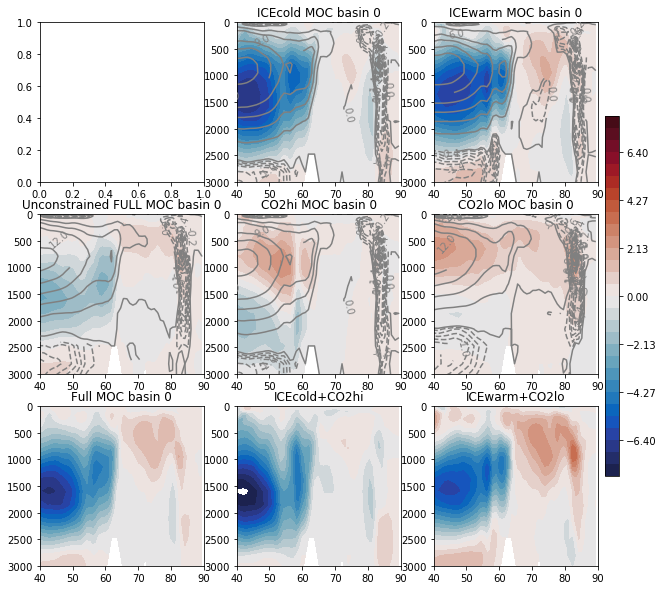

In [297]:
# SAME as above but focus on north atlantic only

printtofile=False

slim=40

contspn = np.arange(0,37,3)
contsnn = np.arange(-5,-.1,.2)

cmin=-8;cmax=8
cmap= cmo.cm.balance #cmo.cm.delta
cmlen=float(30)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

fig,axs = plt.subplots(3,3,figsize=(10,10))
ax=axs[0,0]


ax=axs[0,1]
CF1=ax.contourf(lats,levs,picomoc-pipimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,picomoc-pipimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
# climo contours
CS1 = ax.contour(lats,levs,pipimoc,contspn,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsnn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('ICEcold MOC basin '+str(basin))

ax=axs[0,2]
CF1=ax.contourf(lats,levs,cocomoc-copimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,cocomoc-copimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,copimoc,contspn,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,copimoc,contsnn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('ICEwarm MOC basin '+str(basin))
#cbar = fig.colorbar(CF1)
cplt.add_colorbar(fig,CF1,orientation='vertical')

ax=axs[1,0]
CF1=ax.contourf(lats,levs,CO-PI,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
CS1 = ax.contour(lats,levs,PI,contspn,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,PI,contsnn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('Unconstrained FULL MOC basin '+str(basin))


ax=axs[1,1]
CF1=ax.contourf(lats,levs,copimoc-pipimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,copimoc-pipimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contspn,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,pipimoc,contsnn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('CO2hi MOC basin '+str(basin))

ax=axs[1,2]
CF1=ax.contourf(lats,levs,cocomoc-picomoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,cocomoc-picomoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,picomoc,contspn,\
            linestyles='solid',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = ax.contour(lats,levs,picomoc,contsnn,\
            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('CO2lo MOC basin '+str(basin))

ax=axs[2,0]
CF1=ax.contourf(lats,levs,cocomoc-pipimoc,cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,cocomoc-pipimoc,levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
# Not sure what the climo contours would be here @@@@
#CS1 = ax.contour(lats,levs,pipimoc,contsp,\
#            linestyles='solid',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,pipimoc,contsn,\
#            linestyles='dashed',colors='0.5',linewidth=.5)
ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('Full MOC basin '+str(basin))

ax=axs[2,1]
CF1=ax.contourf(lats,levs,(picomoc-pipimoc)+(copimoc-pipimoc),
                cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,(picomoc-pipimoc)+(copimoc-pipimoc),
#               levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,pipimoc,contsp,\
#            linestyles='solid',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,pipimoc,contsn,\
#            linestyles='dashed',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('ICEcold+CO2hi')

ax=axs[2,2]
CF1=ax.contourf(lats,levs,(cocomoc-copimoc)+(cocomoc-picomoc),
                cmap=cmap,levels=conts,vmin=cmin,vmax=cmax)
#CS1=ax.contour(lats,levs,(cocomoc-copimoc)+(cocomoc-picomoc),
#               levels=conts,colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,copimoc,contsp,\
#            linestyles='solid',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = ax.contour(lats,levs,copimoc,contsn,\
#            linestyles='dashed',colors='0.5',linewidth=.5)
#ax.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((slim,90))
ax.set_title('ICEwarm+CO2lo')


if printtofile:
    fig.savefig('MOCdiffs_basin' + str(basin)+'_'+seamoc+\
                '_withclimo_controls_'+str(slim)+'N.pdf',
               bbox_inches='tight')

## max AMOC timeseries

In [279]:
latmax= 25 #10 #40 #30
maxidx=cutl.find_nearest(lat,latmax)


pipimocts = MOCts['preipreiice'][:,basin,...]
cocomocts = MOCts['2xco22xco2ice'][:,basin,...]
picomocts = MOCts['prei2xco2iceb'][:,basin,...]
copimocts = MOCts['2xco2preiice'][:,basin,...]

COts = MOCts['gregory_2xco2'][:,basin,...]
PIts = MOCts['piControl'][:,basin,...]

print pipimocts.shape,picomocts.shape

# Need to fix the pico timeseries which is missing 10 years (3152-3161, 
# or indices 130-139 in 200 year timeseries. and 229-238 in 301 year timeseries)
#sl=slice(130,140)
sl=slice(229,239)
picomocts = np.insert(picomocts, sl, np.nan, axis=0)

print picomocts.shape

pipimocmaxts = np.max(pipimocts[:,:,maxidx],axis=1)
cocomocmaxts = np.max(cocomocts[:,:,maxidx],axis=1)
picomocmaxts = np.max(picomocts[:,:,maxidx],axis=1)
copimocmaxts = np.max(copimocts[:,:,maxidx],axis=1)

PImaxts = np.max(PIts[:,:,maxidx],axis=1)
COmaxts = np.max(COts[:,:,maxidx],axis=1)

print picomocmaxts.shape
# @@@@ picomocmaxts values north of 40N are 1e20 ?????


(200, 41, 192) (291, 41, 192)
(301, 41, 192)
(301,)


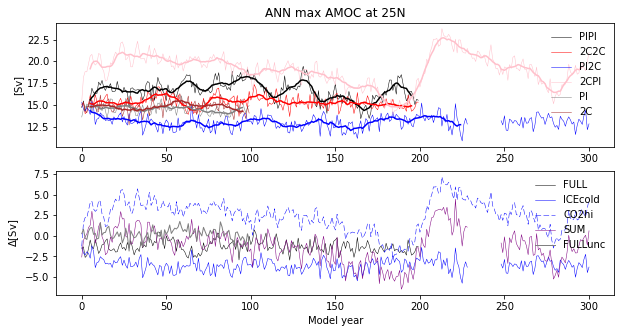

In [284]:
printtofile=True


window=10
xx=np.arange(0,200)
xxrun = xx[window/2:-window/2+1]
xx2=np.arange(0,301)
xxrun2 = xx2[window/2:-window/2+1]
xx3=np.arange(0,100)
xxrun3 = xx3[window/2:-window/2+1]


fig,axs=plt.subplots(2,1,figsize=(10,5))
ax=axs[0]
ax.plot(pipimocmaxts,color='k',linewidth=.5)
ax.plot(cocomocmaxts,color='red',linewidth=.5)
ax.plot(picomocmaxts,color='b',linewidth=.5)
ax.plot(copimocmaxts,color='pink',linewidth=.5)
ax.plot(PImaxts,color='0.5',linewidth=.5)
ax.plot(COmaxts,color='brown',linewidth=.5)

ax.plot(xxrun,cutl.runmean(pipimocmaxts,window=window),color='k')
ax.plot(xxrun,cutl.runmean(cocomocmaxts,window=window),color='red')
ax.plot(xxrun2,cutl.runmean(picomocmaxts,window=window),color='b')
ax.plot(xxrun2,cutl.runmean(copimocmaxts,window=window),color='pink')
ax.plot(xxrun3,cutl.runmean(PImaxts,window=window),color='0.5')
ax.plot(xxrun3,cutl.runmean(COmaxts,window=window),color='brown')

ax.set_ylabel('[Sv]')
ax.legend(('PIPI','2C2C','PI2C','2CPI','PI','2C'),frameon=False,loc='best')
ax.set_title('ANN max AMOC at ' + str(latmax)+'N')

ax=axs[1]
ax.plot(cocomocmaxts-pipimocmaxts.mean(),color='black',linewidth=.5) # Full
ax.plot(picomocmaxts-pipimocmaxts.mean(),color='blue',linewidth=.5) # ICEcold
#ax.plot(cocomocmaxts-picomocmaxts,color='blue',linestyle='dashed',linewidth=.5) # CO2lo
ax.plot(copimocmaxts-pipimocmaxts.mean(),color='blue',linestyle='dashed',linewidth=.5) # CO2hi
ax.plot(picomocmaxts-pipimocmaxts.mean()+copimocmaxts-pipimocmaxts.mean(),
        color='purple',linewidth=.5)
ax.plot(COmaxts-PImaxts.mean(),color='0.5',linewidth=1) # Fullunc

ax.set_ylabel('$\Delta$[Sv]')
ax.legend(('FULL','ICEcold','CO2hi','SUM','FULLunc'),frameon=False,loc='best')
ax.set_xlabel('Model year')

if printtofile:
    fig.savefig('AMOC_maxat'+str(latmax)+'N_'+seamoc+ '_timeseries_controls.pdf',bbox_inches='tight')